# 머신러닝 7과정

### 1. 문제정의  
    - 500명의 키와 몸무게 , 비만도 데이터를 활용하여 비만을 판단하는 모델을 만들어 보자!
    - 머신러닝의 과정을 이해하자
### 2. 데이터 수집
    - 데이터 
### 3. 데이터 전처리
### 4. 탐색적 데이터 분석 (EDA)
    - 데이터들을 분석하고 조사하여 주요 특성들을 파악
    - 시각화를 통해서 데이터의 분포현황을 살펴본다.
    - 기술통계량 확인 (데이터에 대해 통계적으로 기술한 것(설명) 통계량(평균, 최대값, 최소값, 최빈값?))
### 5. 모델 선택, HyperParameter 조절
    - 문제 데이터와 답 데이터로 분리
    - 7  :  3 으로 분리
    - 
### 6. 학습
### 7. 테스트

In [1]:
# 필요한 라이브러리 가져오기
import pandas as pd
import matplotlib.pyplot as plt
# 머신러닝 모델 학습을 위한 도구
# scikit -learn 
# 파이썬에서 쉽게 사용할 수 있는 머신러닝 프레임워크 , 라이브러리
# 회구, 분류, 군집, 차원축소, 특성공학, 전처리 , 교차검증, 파이프라인등 머신러닝에 필요한 도구를 갖춤
from sklearn.neighbors import KNeighborsClassifier as knn


In [4]:
# 데이터 불러오기
Data =  pd.read_csv("./bmi_500.csv", index_col="Label")
print(Data)




                 Gender  Height  Weight
Label                                  
Obesity            Male     174      96
Normal             Male     189      87
Obesity          Female     185     110
Overweight       Female     195     104
Overweight         Male     149      61
...                 ...     ...     ...
Extreme Obesity  Female     150     153
Obesity          Female     184     121
Extreme Obesity  Female     141     136
Extreme Obesity    Male     150      95
Extreme Obesity    Male     173     131

[500 rows x 3 columns]


In [7]:
# 데이터 크기 확인 -> 행열
Data.shape
# 500 명 , 컬럼(gender , height , weight)


(500, 3)

In [11]:
# 어떤 정보를 가지고 있는지 데이터 정보 확인
Data.info()
# 결측치 여부 확인 : Non Null 값을 통해 확인 가능
# 어떤 데이터 타입인지 확인 (머신러닝? 문자열 학습 x ?)_ 수치 형태로 변경 필요

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [13]:
# 데이터 전처리가 필요하다면 수행, 현제 데이터는 clean -> 결측치 x , 수치 형태의 데이터

# label 확인
# label -> 범주형 형태의 데이터 -> 분류모델을 사용하겠다.
Data.index.unique()
# Extreme Obesity : 고도비만
# Obesity : 비만
# Overweight : 과체중
# Normal : 정상
# Weak : 저체중
# Extremely Weak : 심한 저체중



Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [15]:

# 탐색적 데이터 분석 EDA (Explorator Data Analysis)

# 기술통계 확인
# 데이터의 개수 평균 ,표준편차, 최솟값, 4분위수, 최댓값
# 중위수(50%)와 평균이 큰 차이가 나지 않음을 확인 -> 이상치의 영향을 받지 않고 있음
Data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


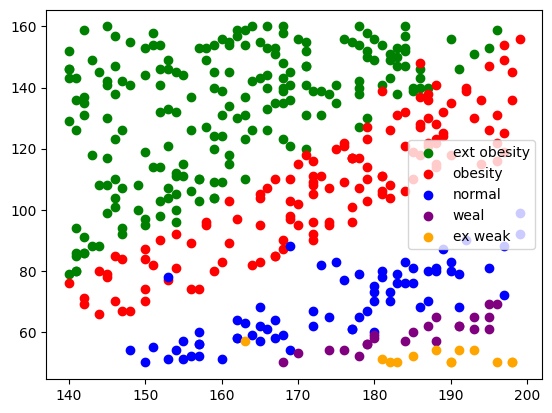

In [31]:
# 데이터 시각화(bmi 레이블 별로 분포현황) - > 산점도

# Extreme Obesity
exo = Data.loc['Extreme Obesity']
ob = Data.loc['Obesity']
no = Data.loc['Normal']
we = Data.loc['Weak']
exw = Data.loc['Extremely Weak']

# 시각화
plt.scatter(exo.loc[:,'Height'],exo.loc[:,'Weight'], c = "Green" , label = "ext obesity")
plt.scatter(ob.loc[:,'Height'],ob.loc[:,'Weight'], c = "Red" , label = "obesity")
plt.scatter(no.loc[:,'Height'],no.loc[:,'Weight'], c = "Blue" , label = "normal")
plt.scatter(we.loc[:,'Height'],we.loc[:,'Weight'], c = "Purple" , label = "weal")
plt.scatter(exw.loc[:,'Height'],exw.loc[:,'Weight'], c = "Orange" , label = "ex weak")
# 범례
plt.legend()
plt.show()

In [32]:
#  동일한 코드를 반복작성하기에느 비효율적
# 사용자 정의 함수를 활용

def makeScatter(label , color):
    d = Data.loc[label]
    plt.scatter(d.loc[:,'Height'],d.loc[:,'Weight'], c = color , label = label)


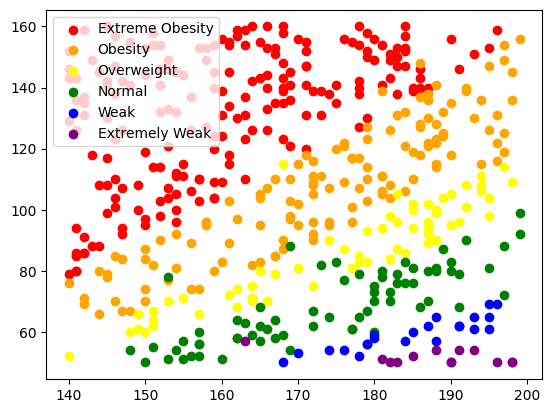

In [42]:
# 함수 호출하기

makeScatter("Extreme Obesity", "red")
makeScatter("Obesity", "Orange")
makeScatter("Overweight", "Yellow")
makeScatter("Normal", "Green")
makeScatter("Weak", "Blue")
makeScatter("Extremely Weak", "Purple")
plt.legend()
plt.show()

# 데이터 전처리에 대해 확인
# 서로 데이터 분리가 잘 되어있는 편이므로 전처리 없이 그대로 진행


In [49]:
# 문제데이터 (X) : 키, 몸무게
X = Data[['Height','Weight']]
# 정답데이터(y) : Label

y = Data.index

print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [53]:
# 데이터 분리(학습용 , 테스트용)
# from sklearn.model_selection import train_test_split
# X_train , X_test=   train_test_split(X, test_size= 0.3)
# y_train,y_test = train_test_split(y, test_size= 0.3)

X_train = X.iloc[0:350]
X_test = X.iloc[350:500]
y_train = y[0:350]
y_test = y[350:500]

print("훈련용 문제 : ",X_train.shape)
print("훈련용 답 : ",y_train.shape)
print("테스트용 문제 : ",X_test.shape)
print("테스트용 답 : " , y_test.shape)

훈련용 문제 :  (350, 2)
훈련용 답 :  (350,)
테스트용 문제 :  (150, 2)
테스트용 답 :  (150,)


In [66]:
# 머시러닝 패키지(라이브러리) sklearn
from sklearn.neighbors import KNeighborsClassifier as knn # knn 분류모델
from sklearn.metrics import accuracy_score  # 정확도 측정 도구

# 모델 생성
KNN_model = knn(n_neighbors=10)
# 학습
KNN_model.fit(X_train,y_train)
# 예측
predict_model = KNN_model.predict(X_test)
# 결과
accuracy_score(predict_model,y_test )

0.94